# RTB data analysis

Here is a sampled data from the [kaggle avazu-ctr-prediction](https://www.kaggle.com/c/avazu-ctr-prediction/) competition.

The goal of this competition is to predict user will click or not on each impression. Hence, the cloumn `click` is the prediction target.

Here is a snapshot of the data:


In [1]:
import pandas as pd

df = pd.read_csv('sub_train.csv')
df

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,5.211594e+11,0,14102905,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,21611,320,50,2480,3,297,100111,61
1,1.296229e+12,0,14102603,1002,0,ddcc553b,d600b051,50e219e0,ecad2386,7801e8d9,...,0,0,21413,320,50,2467,2,167,100081,23
2,1.398959e+12,0,14102717,1010,1,85f751fd,c4e18dd6,50e219e0,03a08c3f,7801e8d9,...,4,0,15703,320,50,1722,0,35,-1,79
3,2.052565e+12,0,14102117,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,21761,320,50,2502,0,35,-1,221
4,2.219877e+12,1,14102317,1005,1,0a742914,510bd839,f028772b,ecad2386,7801e8d9,...,1,0,20634,320,50,2374,3,39,-1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4.575199e+16,1,14102415,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,17747,320,50,1974,2,39,-1,33
99996,4.575223e+16,0,14102817,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,20108,320,50,2299,2,1327,-1,52
99997,4.575460e+16,1,14102212,1005,0,85f751fd,c4e18dd6,50e219e0,4b08f369,2347f47a,...,1,2,21767,320,50,2506,0,35,-1,157
99998,4.575526e+16,0,14103012,1005,0,85f751fd,c4e18dd6,50e219e0,5a8c13b1,d9b5648e,...,1,0,23866,320,50,2736,0,33,-1,246


## Q1:
Calculate the CTR of the whole dataset.
The definition of CTR is:

$CTR=\frac{\#clicks}{\#impressions}$

where each row of the data represents a impression.
and value of the `click` column indicates it is clicked or not.

In [2]:
# my live coding answer
ctr = len(df[df['click']==1])/len(df)
ctr

0.1699

In [10]:
# another way
df['click'].sum()/len(df['click'])

0.1699

## Q2:
Finding top 10 `app_id` with highest CTR 

In [12]:
df1 = df.groupby("app_id")['click'].agg(['count','sum'])
df1

,count,sum
app_id,,
00206799,1,1
003def94,1,0
00a55543,2,0
013d2249,3,1
013fcca9,1,0
...,...,...
febd1138,1882,90
ff131459,1,1
ff665dfa,1,0


In [22]:
df1['ctr'] = (df1['sum'] / df1['count'])
df2 = df1.sort_values(by="ctr",ascending=False)
df2

# show all records
# from IPython.display import display, HTML
# display(HTML(df2.to_html()))

,count,sum,ctr
app_id,,,
00206799,1,1,1.0
a34686f5,2,2,1.0
62a4a8d0,1,1,1.0
62ac1778,1,1,1.0
643e0f88,2,2,1.0
...,...,...,...
7517bc36,1,0,0.0
7548799f,1,0,0.0
14302827,1,0,0.0


In [15]:
df2.index[:10]

Index(['00206799', 'a34686f5', '62a4a8d0', '62ac1778', '643e0f88', '661aa3aa',
       '683b8f87', '6b0b71ec', '163f0ac8', '715a71de'],
      dtype='object', name='app_id')

# Q3:
Any observation on this outcome?

(1) 前幾名 ctr 都是 1 怎麼看?</br>

impressions too low.</br>

If you’re seeing your impressions and CTR increase yet are getting NO customers</br>
There are 1 of 2 things happening</br>
1. You have a really bad offer(報價) / your sales process isn’t good.</br>
2. More likely option, you’re not getting the right people seeing your ads.</br>

(2) 依據目前分析的結果你會怎麼推薦老闆要在哪個 app_id 渠道下廣告?</br>

建議用總 impressions 排序(暫時取30名)，在 impressions 較高的前幾個 app_id 渠道再去排序 ctr，搭配老闆這邊的預算去做投放分配</br>
以該資料分布來說，會選 ctr 15% 以上的 app_id 渠道<br>

(3) ctr 那個切分的 threshold 15% 你怎麼判斷的，有客觀的方法去處理嗎?</br>

以 data visualization 來看有沒有一個突然跳起的點</br>
For arts and entertainment, the average click-through rate is 10.67%, so a good CTR for businesses in this industry would be something like 11-12%. However, those are the two extremes. You can see that most industries have an average click-through rate of between 4-6%. So a good Google Ads click-through rate is 6-7%+.

In [24]:
df3 = df2.sort_values(by="count",ascending=False).head(30)
df3

,count,sum,ctr
app_id,,,
ecad2386,63900,12706,0.198842
92f5800b,3803,65,0.017092
e2fcccd2,2798,540,0.192995
9c13b419,1942,588,0.302781
febd1138,1882,90,0.047821
7358e05e,1510,268,0.177483
a5184c22,1190,280,0.235294
d36838b1,1103,79,0.071623
685d1c4c,1043,72,0.069032


In [25]:
df4 = df3.sort_values(by="ctr",ascending=False)
df4

,count,sum,ctr
app_id,,,
9c13b419,1942,588,0.302781
a5184c22,1190,280,0.235294
66f5e02e,561,117,0.208556
ecad2386,63900,12706,0.198842
3c4b944d,237,47,0.198312
e2fcccd2,2798,540,0.192995
7358e05e,1510,268,0.177483
1dc72b4d,267,43,0.161049
e2a1ca37,673,107,0.158990


<AxesSubplot:xlabel='app_id'>

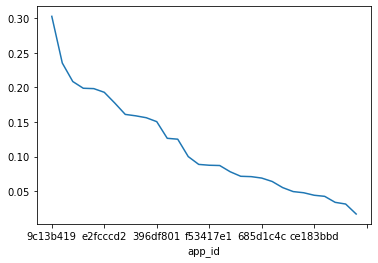

In [26]:
df4.ctr.plot()